In [1]:
import pandas as pd
import os
import json
import numpy as np
from itertools import groupby
import matplotlib.pyplot as plt
from scipy import stats,signal
import matplotlib as mpl
from sklearn.linear_model import LogisticRegression
import random
import re
import csv
from IPython.display import HTML, display, Image
import tabulate
import math as m
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import statsmodels.formula.api as smf
import itertools

import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/home/cbclab/Dropbox/postdocUPF/jatos_experiments')
import my_functions as myf

mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['lines.markersize'] = 10
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['axes.linewidth'] = 1
#mpl.rcParams['xtick.major.size'] = 20
mpl.rcParams['xtick.major.width'] = 1
#mpl.rcParams['xtick.minor.size'] = 10
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

fday = [1,2,3,4,5,6,7,8,9,10]
fsession = [1,2]
session_labels = ['Th','Fr','Sa','Su','Mo','Tu','We','Th','Fr','Sa']

SR_color = {'mood': [0.1,0.5,1],'food': [1,0.5,0.1],'sleep': 'y', 'real_stress':[0.1,0.5,0.2]}
PV_color = {'DO':[1,0,0.4],'SO':[0.4,0,1],'NO':'k'}
PV_line = {'DO':'-','SO':'-','NO':'-'}

key_SR = ['mood','food','sleep', 'real_stress']
key_PV = ['Dsubj_optout_oo','Ssubj_optout_oo','subj_perf_no','OKubj_RT_no','DoverConf','SoverConf','risk_av']
key_LR = ['slope_RT', 'slope_DO', 'slope_SO', 'intercept_RT', 'intercept_DO','intercept_SO']
key_name = key_SR+key_PV

pair_keys_SR = list(itertools.combinations(key_SR, 2))
key_SR = ['mood','food','sleep', 'real_stress']
key_SR2plot = [key_SR[:int(len(key_SR)/2)],key_SR[int(len(key_SR)/2):]]

# pair of PV 
pair_keys_PV = list(itertools.combinations(key_PV[:-3], 2))
pair_keys_PV2plot = [pair_keys_PV[:int(len(pair_keys_PV)/2)],pair_keys_PV[int(len(pair_keys_PV)/2):]]
key_name_PV = {'Dsubj_optout_oo':'DO','Ssubj_optout_oo':'SO','subj_perf_no':'acc NO','OKubj_RT_no':'RT NO',\
              'DoverConf':'DO overconf.','SoverConf':'SO overconf.','risk_av':'risk aversion',\
              'slope_RT':'slope RT', 'slope_DO':'slope DO', 'slope_SO':'slope SO', \
               'intercept_RT':'intercept RT', 'intercept_DO':'intercept DO','intercept_SO':'intercept SO'}
pair_key_name_PV2plot = [[[key_name_PV[k] for k in tupl] for tupl in lista] for lista in pair_keys_PV2plot]

pair_SR_PV,pair_SR_PV2plot = [],[]
for pv in key_PV+key_LR:
    aux = []
    for sr in key_SR:
        pair_SR_PV.append((sr,pv))
        aux.append((sr,pv))
    pair_SR_PV2plot.append(aux)

key_diff = ['Dperf_oo', 'Sperf_oo', 'perf_no', 'Dn_trials_oo', 'Sn_trials_oo', 'NOn_trials', \
            'DRT_OKoo', 'SRT_OKoo', 'RT_no', 'RT_noNOK', 'Doptout', 'Soptout']

unique_signals_dots = [1,2,3,4]
unique_signals_gabor = [1,2,3]

main_path = '/home/cbclab/Dropbox/postdocUPF/jatos_experiments'

path_results_dots = main_path + '/dots/notebooks/results_tanda_1/'
path_results_gabor = main_path + '/gabor/notebooks/results_tanda_1/'

In [2]:
file=path_results_dots+'mean_across_participants.json'
with open(file) as f:
    as_dots = json.load(f)
file=path_results_dots+'se_across_participants.json'
with open(file) as f:
    se_dots = json.load(f)

In [3]:
file=path_results_gabor+'mean_across_participants.json'
with open(file) as f:
    as_gabor = json.load(f)
file=path_results_gabor+'se_across_participants.json'
with open(file) as f:
    se_gabor = json.load(f)

In [4]:
f='corrSR_PV.json'
with open(path_results_dots+f) as f:
    data_pd = json.load(f)
for k, v in data_pd.items():
    globals()[k+'_dots']=v  

In [5]:
# convert string key into tuples

new_key = {}
for k,v in corr_SR_PV_dots.items():
    aux = k.split("-")
    new_key[k] = (aux[0],aux[1])
for k,v in new_key.items():
    corr_SR_PV_dots[v] = corr_SR_PV_dots.pop(k)
    p_SR_PV_dots[v] = p_SR_PV_dots.pop(k)
    SIG_SR_PV_dots[v] = SIG_SR_PV_dots.pop(k)
    NOS_SR_PV_dots[v] = NOS_SR_PV_dots.pop(k)

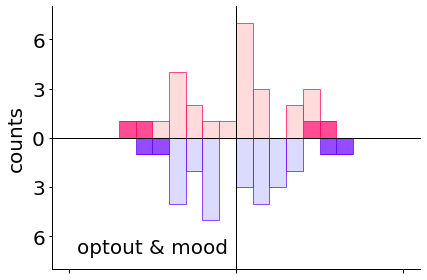

In [6]:
fig ,(ax1,ax2) = plt.subplots(2,1,gridspec_kw={'hspace':0})

ax1.hist([SIG_SR_PV_dots[('mood', 'Dsubj_optout_oo')],NOS_SR_PV_dots[('mood', 'Dsubj_optout_oo')]],\
          bins=np.arange(-1,1,0.1),alpha=0.7,histtype='bar', stacked=True, \
          color=[PV_color['DO'],[1,0.8,0.8]], edgecolor=PV_color['DO'], linewidth=1)
ax1.set_yticks([0,3,6])
ax1.set_xlim(-1.1,1.1)
ax1.set_ylabel('counts',fontsize=20)
ax1.yaxis.set_label_coords(-0.07,0)
ax1.set_xticks([])
ax1.set_ylim(0,8)
ax1.spines['bottom'].set_visible(True)
ax1.spines['bottom'].set_linewidth(1)
ax1.spines['bottom'].set_color('k')
ax1.axvline(0,color='k',lw=1)

ax2.hist([SIG_SR_PV_dots[('mood', 'Ssubj_optout_oo')],NOS_SR_PV_dots[('mood', 'Ssubj_optout_oo')]],\
          bins=np.arange(-1,1,0.1),color=[PV_color['SO'],[0.8,0.8,1]],alpha=0.7,histtype='bar',\
         stacked=True,edgecolor=PV_color['SO'], linewidth=1)
ax2.set_yticks([3,6])
ax2.set_xticks([-1,0,1])
ax2.set_xticklabels([])
ax2.set_xlim(-1.1,1.1)
ax2.set_ylim(0,8)
ax2.invert_yaxis()
ax2.spines['top'].set_visible(True)
ax2.spines['top'].set_linewidth(1)
ax2.spines['top'].set_color('k')
ax2.text(-0.95,7,"optout & mood", ha='left', wrap=True,fontsize=20)
ax2.axvline(0,color='k',lw=1)

plt.tight_layout()
plt.savefig('fig5_corr_optout_mood.png')
plt.show()

In [ ]:
fig ,(ax1,ax2) = plt.subplots(2,1,gridspec_kw={'hspace':0})

ax1.hist([SIG_SR_PV_dots[('sleep', 'Dsubj_optout_oo')],NOS_SR_PV_dots[('sleep', 'Dsubj_optout_oo')]],\
          bins=np.arange(-1,1,0.1),alpha=0.7,histtype='bar', stacked=True, \
          color=[PV_color['DO'],[1,0.8,0.8]], edgecolor=PV_color['DO'], linewidth=1)
ax1.set_yticks([0,3,6])
ax1.set_xlim(-1.1,1.1)
ax1.set_ylabel('counts',fontsize=20)
ax1.yaxis.set_label_coords(-0.07,0)
ax1.set_xticks([])
ax1.set_ylim(0,8)
ax1.spines['bottom'].set_visible(True)
ax1.spines['bottom'].set_linewidth(1)
ax1.spines['bottom'].set_color('k')
ax1.axvline(0,color='k',lw=1)

ax2.hist([SIG_SR_PV_dots[('sleep', 'Ssubj_optout_oo')],NOS_SR_PV_dots[('sleep', 'Ssubj_optout_oo')]],\
          bins=np.arange(-1,1,0.1),color=[PV_color['SO'],[0.8,0.8,1]],alpha=0.7,histtype='bar',\
         stacked=True,edgecolor=PV_color['SO'], linewidth=1)
ax2.set_yticks([3,6])
ax2.set_xticks([-1,0,1])
ax2.set_xticklabels([])
ax2.set_xlim(-1.1,1.1)
ax2.set_ylim(0,8)
ax2.invert_yaxis()
ax2.spines['top'].set_visible(True)
ax2.spines['top'].set_linewidth(1)
ax2.spines['top'].set_color('k')
ax2.text(-0.95,7,"optout & sleep", ha='left', wrap=True,fontsize=20)
ax2.axvline(0,color='k',lw=1)

plt.tight_layout()
plt.savefig('fig5_corr_optout_sleep.png')
plt.show()

In [ ]:
fig ,(ax1,ax2) = plt.subplots(2,1,gridspec_kw={'hspace':0})

ax1.hist([SIG_SR_PV_dots[('food', 'Dsubj_optout_oo')],NOS_SR_PV_dots[('food', 'Dsubj_optout_oo')]],\
          bins=np.arange(-1,1,0.1),alpha=0.7,histtype='bar', stacked=True, \
          color=[PV_color['DO'],[1,0.8,0.8]], edgecolor=PV_color['DO'], linewidth=1)
ax1.set_yticks([0,3,6])
ax1.set_xlim(-1.1,1.1)
ax1.set_ylabel('counts',fontsize=20)
ax1.yaxis.set_label_coords(-0.07,0)
ax1.set_xticks([])
ax1.set_ylim(0,8)
ax1.spines['bottom'].set_visible(True)
ax1.spines['bottom'].set_linewidth(1)
ax1.spines['bottom'].set_color('k')
ax1.axvline(0,color='k',lw=1)

ax2.hist([SIG_SR_PV_dots[('food', 'Ssubj_optout_oo')],NOS_SR_PV_dots[('food', 'Ssubj_optout_oo')]],\
          bins=np.arange(-1,1,0.1),color=[PV_color['SO'],[0.8,0.8,1]],alpha=0.7,histtype='bar',\
         stacked=True,edgecolor=PV_color['SO'], linewidth=1)
ax2.set_yticks([3,6])
ax2.set_xticks([-1,0,1])
ax2.set_xticklabels([-1,0,1])
ax2.set_xlim(-1.1,1.1)
ax2.set_ylim(0,8)
ax2.invert_yaxis()
ax2.spines['top'].set_visible(True)
ax2.spines['top'].set_linewidth(1)
ax2.spines['top'].set_color('k')
ax2.text(-0.95,7,"optout & food", ha='left', wrap=True,fontsize=20)
ax2.axvline(0,color='k',lw=1)

plt.tight_layout()
plt.savefig('fig5_corr_optout_food.png')
plt.show()


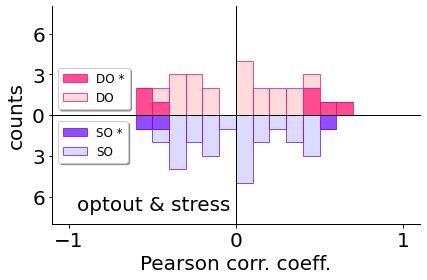

In [19]:
fig ,(ax1,ax2) = plt.subplots(2,1,gridspec_kw={'hspace':0})

ax1.hist([SIG_SR_PV_dots[('real_stress', 'Dsubj_optout_oo')],NOS_SR_PV_dots[('real_stress', 'Dsubj_optout_oo')]],\
          bins=np.arange(-1,1,0.1),alpha=0.7,histtype='bar', stacked=True, \
          color=[PV_color['DO'],[1,0.8,0.8]], edgecolor=PV_color['DO'], linewidth=1)
ax1.set_yticks([0,3,6])
ax1.set_xlim(-1.1,1.1)
ax1.set_ylabel('counts',fontsize=20)
ax1.yaxis.set_label_coords(-0.07,0)
ax1.set_xticks([])
ax1.set_ylim(0,8)
ax1.spines['bottom'].set_visible(True)
ax1.spines['bottom'].set_linewidth(1)
ax1.spines['bottom'].set_color('k')


ax2.hist([SIG_SR_PV_dots[('real_stress', 'Ssubj_optout_oo')],NOS_SR_PV_dots[('real_stress', 'Ssubj_optout_oo')]],\
          bins=np.arange(-1,1,0.1),color=[PV_color['SO'],[0.8,0.8,1]],alpha=0.7,histtype='bar',\
         stacked=True,edgecolor=PV_color['SO'], linewidth=1)
ax2.set_yticks([3,6])
ax2.set_xticks([-1,0,1])
ax2.set_xlim(-1.1,1.1)
ax2.set_ylim(0,8)
ax2.invert_yaxis()
ax2.spines['top'].set_visible(True)
ax2.spines['top'].set_linewidth(1)
ax2.spines['top'].set_color('k')
ax2.text(-0.95,7,"optout & stress", ha='left', wrap=True,fontsize=20)

ax2.set_xlabel('Pearson corr. coeff.',fontsize=20)

ax1.legend(("DO *","DO"),loc='lower left', shadow=True,fontsize=12)
ax2.legend(("SO *","SO"),loc='upper left', shadow=True,fontsize=12)

ax1.axvline(0,color='k',lw=1)
ax2.axvline(0,color='k',lw=1)
plt.tight_layout()
plt.savefig('fig5_corr_optout_stress.png')
plt.show()

In [15]:
round_p_SR_PV = np.array([myf.roundP(p_SR_PV_dots[(pair)]) for pair in pair_SR_PV])
round_p_SR_PV = np.reshape(round_p_SR_PV,(13,4))
p_value = []
ind = -1
for key in key_PV+key_LR:
    ind += 1
    p_value.append(list(round_p_SR_PV[ind]))

In [16]:
round_r_SR_PV = np.array([myf.roundP(np.mean(corr_SR_PV_dots[(pair)])) for pair in pair_SR_PV])
round_r_SR_PV = np.reshape(round_r_SR_PV,(13,4))
r_value = []
r_table = [['r_value']+key_SR]
ind = -1
for key in key_PV+key_LR:
    ind += 1
    r_value.append(list(round_r_SR_PV[ind]))
    r_table.append([key]+list(round_r_SR_PV[ind]))
    
display(HTML(tabulate.tabulate(r_table, tablefmt='html')))

r_value,mood,food,sleep,real_stress
Dsubj_optout_oo,-0.006,0.05,-0.06,0.008
Ssubj_optout_oo,-0.005,0.05,-0.06,-0.02
subj_perf_no,0.05,0.007,-0.02,-0.08
OKubj_RT_no,-0.09,0.0006,-0.05,0.06
DoverConf,-0.06,-0.04,0.06,0.05
SoverConf,-0.02,-0.05,0.08,0.07
risk_av,-0.05,0.07,0.03,0.04
slope_RT,-0.02,0.008,-0.04,-0.01
slope_DO,0.003,0.02,-0.05,-0.01
slope_SO,7e-05,0.07,0.02,0.04


In [17]:
p_value

[[0.9, 0.3, 0.4, 0.9],
 [0.9, 0.2, 0.48, 0.8],
 [0.4, 0.9, 0.8, 0.1],
 [0.03, 1.0, 0.4, 0.3],
 [0.4, 0.4, 0.4, 0.3],
 [0.7, 0.2, 0.2, 0.1],
 [0.1, 0.05, 0.7, 0.4],
 [0.7, 0.8, 0.6, 0.8],
 [1.0, 0.7, 0.48, 0.8],
 [1.0, 0.2, 0.8, 0.5],
 [0.47, 1.0, 0.8, 0.2],
 [0.6, 0.6, 0.6, 0.4],
 [0.53, 1.0, 0.4, 0.8]]

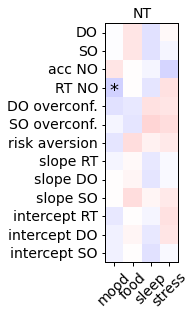

In [18]:
plt.figure(figsize=(6.5,4.5))
plt.title('NT',fontsize=14)
plt.imshow(r_value,cmap='seismic',interpolation='nearest', vmin=-1, vmax=1)
plt.xticks(np.arange(4),['mood','food','sleep','stress'],rotation=45,fontsize=14)
plt.yticks(np.arange(13),[key_name_PV[k] for k in key_PV+key_LR],ha='right',
         verticalalignment='center',
         multialignment='center',fontsize=14)
#plt.colorbar()
#plt.title('Numerosity task')
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)

for i in range(13):
    for j in range(4):
        posy = j+0.16
        #print(key_PV[i],p_value[i][j],myf.p_stars(p_value[i][j]),i,posy)
        plt.text(j,i+0.4,myf.p_stars(p_value[i][j]),fontsize=18, ha='center', wrap=True)
plt.tight_layout()
plt.savefig('fig5_SR_PV_corr_dots.png')
plt.show()

In [7]:
f='corrSR_PV.json'
with open(path_results_gabor+f) as f:
    data_pd = json.load(f)
for k, v in data_pd.items():
    globals()[k+'_gabor']=v  

In [8]:
# convert string key into tuples

new_key = {}
for k,v in corr_SR_PV_gabor.items():
    aux = k.split("-")
    new_key[k] = (aux[0],aux[1])
for k,v in new_key.items():
    corr_SR_PV_gabor[v] = corr_SR_PV_gabor.pop(k)
    p_SR_PV_gabor[v] = p_SR_PV_gabor.pop(k)
    SIG_SR_PV_gabor[v] = SIG_SR_PV_gabor.pop(k)
    NOS_SR_PV_gabor[v] = NOS_SR_PV_gabor.pop(k)

In [9]:
round_p_SR_PV = np.array([myf.roundP(p_SR_PV_gabor[(pair)]) for pair in pair_SR_PV])
round_p_SR_PV = np.reshape(round_p_SR_PV,(13,4))
p_value = []
ind = -1
for key in key_PV+key_LR:
    ind += 1
    p_value.append(list(round_p_SR_PV[ind]))

In [10]:
round_r_SR_PV = np.array([myf.roundP(np.mean(corr_SR_PV_gabor[(pair)])) for pair in pair_SR_PV])
round_r_SR_PV = np.reshape(round_r_SR_PV,(13,4))
r_value = []
r_table = [['r_value']+key_SR]
ind = -1
for key in key_PV+key_LR:
    ind += 1
    r_value.append(list(round_r_SR_PV[ind]))
    r_table.append([key]+list(round_r_SR_PV[ind]))
    
display(HTML(tabulate.tabulate(r_table, tablefmt='html')))

r_value,mood,food,sleep,real_stress
Dsubj_optout_oo,-0.02,0.003,-0.1,0.04
Ssubj_optout_oo,0.05,0.1,0.1,0.005
subj_perf_no,-0.02,0.02,-0.04,0.01
OKubj_RT_no,-0.0002,-0.02,0.03,0.03
DoverConf,0.02,0.08,-0.04,-0.007
SoverConf,-0.04,0.008,-0.03,0.01
risk_av,-0.02,-0.05,0.1,0.04
slope_RT,0.03,0.07,0.09,0.04
slope_DO,-0.04,-0.05,-0.02,-0.04
slope_SO,0.02,0.05,-0.02,-0.05


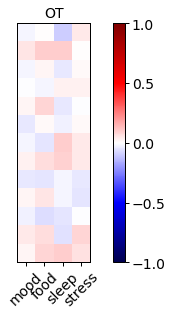

In [12]:
plt.figure(figsize=(6.5,4.5))
plt.title('OT',fontsize=14)
plt.imshow(r_value,cmap='seismic',interpolation='nearest', vmin=-1, vmax=1)
plt.xticks(np.arange(4),['mood','food','sleep','stress'],rotation=45,fontsize=14)
#plt.yticks(np.arange(4),[key_name_PV[k] for k in key_PV[:-3]])
plt.yticks([])
cbar = plt.colorbar()
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(14)
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)

for i in range(13):
    for j in range(4):
        if i!=j:
            posy = j+0.16
            plt.text(i,posy,myf.p_stars(p_value[i][j]),fontsize=18, ha='center', wrap=True)
plt.tight_layout()
plt.savefig('fig5_SR_PV_corr_gabor.png')
plt.show()

In [13]:
f='PV_SR_CC.json'
with open(path_results_dots+f) as f:
    data_cc = json.load(f)
new_key = {}
for k,v in data_cc.items():
    aux = k.split("-")
    new_key[k] = (aux[0],aux[1])
for k,v in new_key.items():
    data_cc[v] = data_cc.pop(k)

In [14]:
np.arange(-int(len(data_cc[(key_SR2plot[k][i],'Dsubj_optout_oo')]['mean'])/2),\
                              len(data_cc[(key_SR2plot[k][i],'Dsubj_optout_oo')]['mean'])/2)

TypeError: list indices must be integers or slices, not str

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(12,8))
plt.subplots_adjust(hspace = 0.8)  
plt.subplots_adjust(wspace = 0.3)  

for i in range(2):
    for k in range(2):
        ax[i,k].set_ylim(-0.2,0.23)
        
        ax[i,k].set_xticks(np.arange(-10,11,2))
        ax[i,k].set_xlabel('lag (sessions)')
        # DOTS deterministic
        '''
        for j in range(1,len(data_cc[(key_SR2plot[k][i],'Dsubj_optout_oo')]['mean'])+1):
            if data_cc[(key_SR2plot[k][i],'Dsubj_optout_oo')]['pgranger'][j-1]<0.05:
                ax[i,k].scatter(j,data_cc[(key_SR2plot[k][i],'Dsubj_optout_oo')]['mean'][j-1],marker='*',s=300,c='#ffffff',edgecolors = PV_color['DO'], zorder=3)
        '''
        ax[i,k].plot(np.arange(-int(len(data_cc[(key_SR2plot[k][i],'Dsubj_optout_oo')]['mean'])/2),\
                              len(data_cc[(key_SR2plot[k][i],'Dsubj_optout_oo')]['mean'])/2),data_cc[(key_SR2plot[k][i],'Dsubj_optout_oo')]['mean'], color = PV_color['DO'], zorder=2)
        ax[i,k].fill_between(np.arange(-int(len(data_cc[(key_SR2plot[k][i],'Dsubj_optout_oo')]['mean'])/2),\
                                      len(data_cc[(key_SR2plot[k][i],'Dsubj_optout_oo')]['mean'])/2),\
                             np.array(data_cc[(key_SR2plot[k][i],'Dsubj_optout_oo')]['mean'])-np.array(data_cc[(key_SR2plot[k][i],'Dsubj_optout_oo')]['se']), \
                           np.array(data_cc[(key_SR2plot[k][i],'Dsubj_optout_oo')]['mean'])+np.array(data_cc[(key_SR2plot[k][i],'Dsubj_optout_oo')]['se']), color = PV_color['DO'], alpha=0.2)
        # DOTS stochastic
        '''
        for j in range(1,len(data_cc[(key_SR2plot[k][i],'Ssubj_optout_oo')]['mean'])+1):
            if data_cc[(key_SR2plot[k][i],'Ssubj_optout_oo')]['pgranger'][j-1]<0.05:
                ax[i,k].scatter(j,data_cc[(key_SR2plot[k][i],'Ssubj_optout_oo')]['mean'][j-1],marker='*',s=300,c='#ffffff',edgecolors = PV_color['SO'], zorder=3)
        '''
        ax[i,k].plot(np.arange(-int(len(data_cc[(key_SR2plot[k][i],'Ssubj_optout_oo')]['mean'])/2),\
                              len(data_cc[(key_SR2plot[k][i],'Ssubj_optout_oo')]['mean'])/2),data_cc[(key_SR2plot[k][i],'Ssubj_optout_oo')]['mean'], color = PV_color['SO'], zorder=2)
        ax[i,k].fill_between(np.arange(-int(len(data_cc[(key_SR2plot[k][i],'Ssubj_optout_oo')]['mean'])/2),\
                                      len(data_cc[(key_SR2plot[k][i],'Ssubj_optout_oo')]['mean'])/2),\
                             np.array(data_cc[(key_SR2plot[k][i],'Ssubj_optout_oo')]['mean'])-np.array(data_cc[(key_SR2plot[k][i],'Ssubj_optout_oo')]['se']), \
                           np.array(data_cc[(key_SR2plot[k][i],'Ssubj_optout_oo')]['mean'])+np.array(data_cc[(key_SR2plot[k][i],'Ssubj_optout_oo')]['se']), color = PV_color['SO'], alpha=0.2)
        if key_SR2plot[k][i]=='real_stress':
            label_ = 'stress'
        else:
            label_ = key_SR2plot[k][i]
        ax[i,k].set_ylabel('CC: optout & '+label_)
        ax[1,1].legend(("DO","SO"),loc='upper right', shadow=True)
        ax[i,k].axhline(0.0,c='k',lw=1)
        
ax[0,1].set_xlim(0.8,4.2)        
ax[0,1].set_xticks(np.arange(-4,5,1))
ax[0,1].set_xlabel('lag (days)')  

plt.tight_layout()
plt.savefig('fig5_optout_SR_CC.png')
plt.show()